In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# **ReadingDataset**

In [ ]:
dataset = pd.read_csv('newhouseproject.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [ ]:
dataset.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.401822e+05
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.673622e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


# Analysis of data

Text(0.5, 1.0, 'Price vs Square Feet')

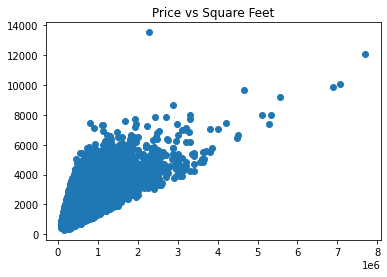

In [ ]:

plt.scatter(dataset.price,dataset.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location of the area')

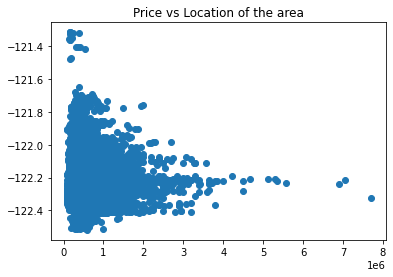

In [ ]:
plt.scatter(dataset.price,dataset.long)
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'Latitude vs Price')

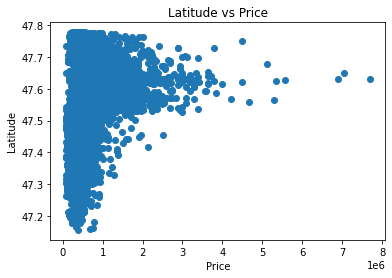

In [ ]:
plt.scatter(dataset.price,dataset.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

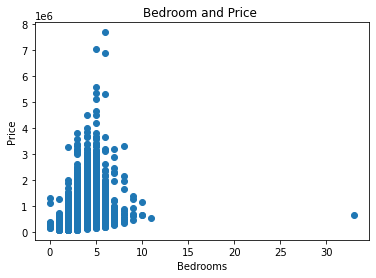

In [ ]:
plt.scatter(dataset.bedrooms,dataset.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()


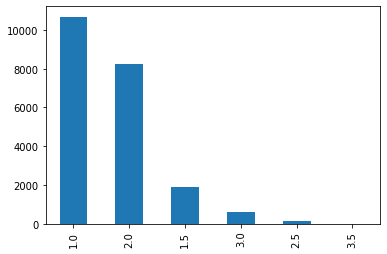

In [ ]:
dataset.floors.value_counts().plot(kind='bar')

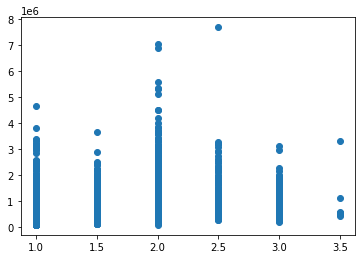

In [ ]:
plt.scatter(dataset.floors,dataset.price)

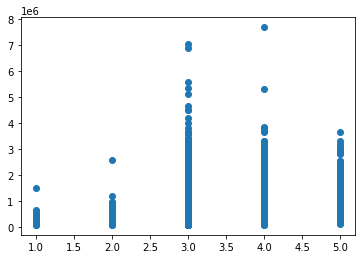

In [ ]:
plt.scatter(dataset.condition,dataset.price)

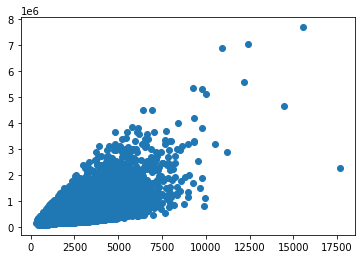

In [ ]:
plt.scatter((dataset['sqft_living']+dataset['sqft_basement']),dataset['price'])

Text(0, 0.5, 'Frequency')

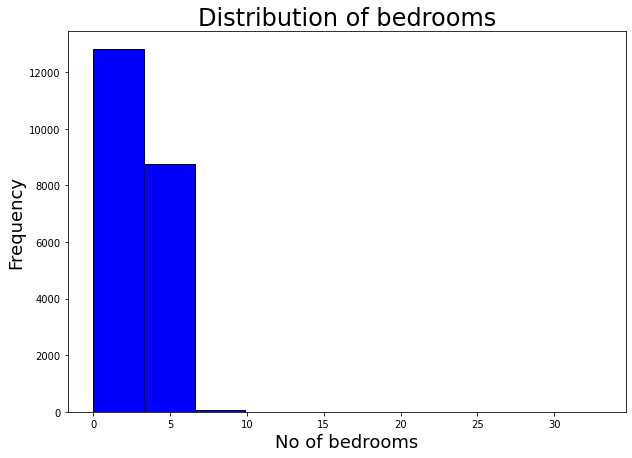

In [ ]:
dataset.bedrooms.plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution of bedrooms', size=24)
plt.xlabel('No of bedrooms', size=18)
plt.ylabel('Frequency', size=18)


Text(0, 0.5, 'Frequency')

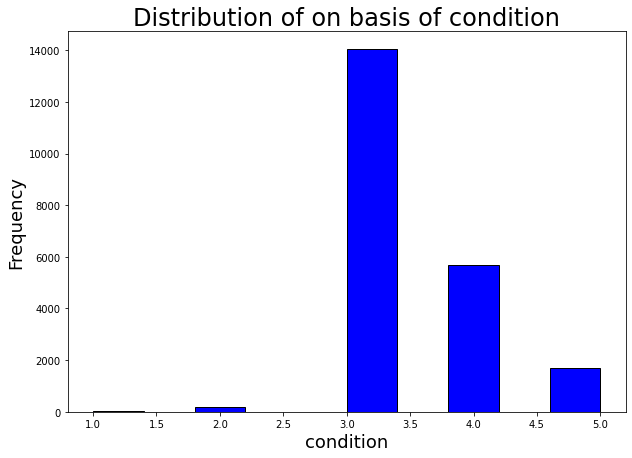

In [ ]:
dataset.condition.plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution of on basis of condition', size=24)
plt.xlabel('condition', size=18)
plt.ylabel('Frequency', size=18)

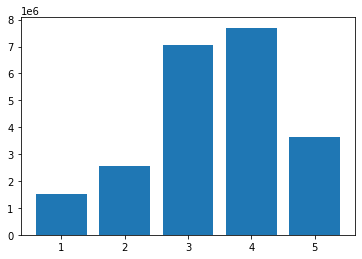

In [ ]:
xcor=dataset['condition']
ycor=dataset['price']
plt.bar(xcor,ycor)
plt.show()

# **Splitting into training and test dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 2)


# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training using Multiple regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting of multiple regression

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 709181.45  735000.  ]
 [1454576.39 1150000.  ]
 [ 422613.52  350500.  ]
 ...
 [ 191299.78  299000.  ]
 [ 237976.17  229950.  ]
 [ 451225.06  571000.  ]]


# Multiple regressor accuracy

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7320721056068111

# Training using decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor(random_state = 0)
regressor3.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

# Predicting using Decision Tree Regression

In [ ]:
y_pred3 = regressor3.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[ 875000.  735000.]
 [1700000. 1150000.]
 [ 409950.  350500.]
 ...
 [ 280000.  299000.]
 [ 182000.  229950.]
 [ 615000.  571000.]]


# Accuracy using Decision Tree

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred3)

0.7811886916668611

# Using Random forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor4 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor4.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# Predicting using Randomforest 

In [ ]:
y_pred4 = regressor4.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred4.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 670650.  735000.]
 [1521210. 1150000.]
 [ 516055.  350500.]
 ...
 [ 266000.  299000.]
 [ 300710.  229950.]
 [ 536495.  571000.]]


# Random forest Accuracy

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred4)

0.8914012881273614

# Training using SupportVectorMachine 

In [ ]:
y = y.reshape(len(y),1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [ ]:
from sklearn.svm import SVR
regressor3 = SVR(kernel = 'rbf')
regressor3.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predicting using SVM

In [ ]:
y_pred3 = sc_y.inverse_transform(regressor3.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[ 709181.45  735000.  ]
 [1454576.39 1150000.  ]
 [ 422613.52  350500.  ]
 ...
 [ 191299.78  299000.  ]
 [ 237976.17  229950.  ]
 [ 451225.06  571000.  ]]


# Accuracy using SVM

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred3)

0.8186320555500426

# Classification using Logistic Regression

In [ ]:
dataset2 = pd.read_csv('newcondition2.csv')

X = dataset2.iloc[:, 0:1].values
y = dataset2.iloc[:, 1].values

print(X)
print(y)
dataset2.isnull().values.sum()


[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
[3 3 3 ... 3 3 3]


0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training dataset using logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting result

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 3]
 [3 4]
 [3 3]
 ...
 [3 3]
 [3 3]
 [3 5]]


# Making Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[   0    0    5    0    0]
 [   0    0   39    0    0]
 [   0    0 3476    0    1]
 [   0    0 1452    0    0]
 [   0    0  431    0    0]]


0.6432272390821614

# Using K nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred1 = classifier2.predict(X_test)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[4 3]
 [3 4]
 [3 3]
 ...
 [3 3]
 [4 3]
 [3 5]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[   0    0    4    1    0]
 [   0    0   29   10    0]
 [   0    4 3037  420   16]
 [   1    1 1246  198    6]
 [   0    0  383   45    3]]


0.5991857883049593

# Using support vector classifer

In [ ]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred3 = classifier3.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[3 3]
 [3 4]
 [3 3]
 ...
 [3 3]
 [3 3]
 [3 5]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[   0    0    5    0    0]
 [   0    0   39    0    0]
 [   0    0 3477    0    0]
 [   0    0 1452    0    0]
 [   0    0  431    0    0]]


0.6434122871946706

# using Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred4 = classifier4.predict(X_test)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.reshape(len(y_test),1)),1))

[[3 3]
 [3 4]
 [3 3]
 ...
 [3 3]
 [3 3]
 [3 5]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_test, y_pred4)



[[   0    0    5    0    0]
 [   0    0   39    0    0]
 [   0    0 3429    0   48]
 [   0    0 1441    0   11]
 [   0    0  424    0    7]]


0.6358253145817913